## Project 1 - Simulated Data Set Analysis 

***

Author: Emma Dunleavy 

Student Number: g00425660

Module: Programming for Data Analysis Winter 2023/24  

Lecturer: Brian McGinley
***

### Required Libraries
***

SKLearn or tensorflow

In [20]:
import pandas as pd
from bs4 import BeautifulSoup
import json
import numpy as np
import scipy.stats as ss

<span style='color:orange'> Part 1 - Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables. </span>

Using the results derived from the Mashhad stroke and heart atherosclerotic disorders (MASHAD) study (2010-2020) [1] the variable of interest is blood pressure, both systolic and diastolic for people categorised as "Normal weight", "Underweight", "Overweight" and "Obese". The other contributing measured variables are "Age", "Weight", "Height" and "Total energy expenditure". Table 1 below provides a summary of the study's statistical findings. 

|Variables| 	Normal weight| 	Underweight |	Overweight| 	Obese| 	P value a| 	P value b |	P value c|
|-----|-----|-----|-----|-----|-----|-----|-----|
||Mean / 	SD| Mean 	/ SD |	Mean	/  SD |	Mean /	SD| value a| value b| value c|
|Age (yr) |	47.9 / 8.5|	47.6	/ 8.1|	48.5 /	8.2|	48.4	/ 7.9	|0.410|	0.009|	0.001|
|Weight(kg) |	47.9 /	6.5|	48.2 /	8.6|	70.8	/ 11.8|	81.6 /	14.8|	0.001|	0.001|	0.001|
|Height (meter) |	1.6	/0.1	|1.6	/0.1	|1.6	/0.1	|1.5 /0.1	|0.002	|0.001|	0.001|
|Total energy expenditure |	2362.0	/ 341.2	|2380.6	 / 384.6	|2357.2 / 	305.2 |  2344.0 /	269.9|	0.740	|0.326	|0.015|
|Systolic blood pressure (mmHg) | 	116.3 /	19.1 |	111.3	/ 20.0	| 120.3 /	20.1|	122.6	/ 26.2 |	0.020	|0.001|	0.001|

Table 1 - Statistical findings


Investigate the types of variables involved, their likely distributions, and their
relationships with each other.

 |Variables|Age (yr) |Weight(kg) |Height (meter) | Total energy expenditure   |Systolic blood pressure (mmHg) |
 |---|:---|---|---|---|---|
 |**variable type level 1**|numerical|numerical|numerical|numerical|numerical|
 |**variable type level 2**|continuous - ratio|continuous - ratio|continuous - ratio|continuous - ratio|continuous - ratio|

The study stated *"Descriptive statistics including <kbd>mean ± standard deviation (SD)</kbd> &nbsp; were determined for variables with normal distribution"*, which is the case for the variables per table 1 so it can therefore be stated all variables for discussion in this report are normally distributed. 


In [21]:
# Define the means and standard deviations for the "healthy weight" variables
hw_age_mean = 47.9
hw_age_sd = 8.5
  
hw_weight_mean = 47.9
hw_weight_sd = 6.5

hw_height_mean = 1.6
hw_height_sd = 0.1

hw_tee_mean = 2362.0
hw_tee_sd = 341.2

hw_bp_mean = 116.3
hw_bp_sd = 19.1

In [22]:
# Set the random seed for reproducibility
np.random.seed(0)

# Generate random data for each variable with the specified standard deviations
hw_age = np.random.normal(hw_age_mean, hw_age_sd, 100)
hw_weight = np.random.normal(hw_weight_mean, hw_weight_sd, 100)
hw_height = np.random.normal(hw_height_mean, hw_height_sd, 100)
hw_tee = np.random.normal(hw_tee_mean, hw_tee_sd, 100)
hw_bp = np.random.normal(hw_bp_mean, hw_bp_sd, 100)

# Create a dataset by combining the variables
hw_dataset = np.column_stack((hw_age, hw_height, hw_weight, hw_tee, hw_bp))

hw_age.std()

8.566999080090927

In [23]:
# Define the means and standard deviations for the "obese" variables
obese_age_mean = 48.4
obese_age_sd = 7.9

obese_weight_mean = 81.6
obese_weight_sd = 14.8

obese_height_mean = 1.5
obese_height_sd = 0.1

obese_tee_mean = 2344.0
obese_tee_sd = 269.9

obese_bp_mean = 122.6
obese_bp_sd = 26.2

# Set the random seed for reproducibility
np.random.seed(0)

# Generate random data for each variable with the specified standard deviations
# Assumption data being reverse engineered is normally distributed
obese_age = np.random.normal(obese_age_mean, obese_age_sd, 1000)
obese_weight = np.random.normal(obese_weight_mean, obese_weight_sd, 1000)
obese_height = np.random.normal(obese_height_mean, obese_height_sd, 1000)
obese_tee = np.random.normal(obese_tee_mean, obese_tee_sd, 1000)
obese_bp = np.random.normal(obese_bp_mean, obese_bp_sd, 1000)

# Create a dataset by combining the variables
obese_dataset = np.column_stack((obese_age, obese_height, obese_weight, obese_tee, obese_bp))
#obese_dataset [:5]
obese_tee.mean()

2338.8873931784537

Using ```obese_tee.mean()``` to test the output v's the inputted <kbd>mean</kbd> shows there is a difference between these two values. The main factors contributing to the discrepancy could include:

1. Sample Size: The mean calculated from a sample of 1000 data points may not exactly match the population mean you specified (i.e., obese_tee_mean). The larger the sample size, the closer the sample mean is expected to be to the population mean, but it may still exhibit some variation.

2. Randomness: Even when generating data from a normal distribution with a specified mean and standard deviation, there is inherent randomness in the process. Each time you run the code, you may get a slightly different mean due to the randomness of the data points generated.

3. Parameter Accuracy: Ensure that the values of obese_tee_mean and obese_tee_sd are set correctly. Any deviation in these parameters will result in a discrepancy between the calculated mean and the specified mean.

4. Calculation Error: The calculation of the mean using obese_tee.mean() is generally accurate, but if there is a coding error or if the data in obese_tee is not as expected, it can lead to a different result.

## REFERENCES NEEDED!!!!

In [24]:
obese_tee.std()

274.1679547539032

In [31]:
hw_dataframe = pd.DataFrame(hw_dataset, columns = ['hw_age', 'hw_height', 'hw_weight', 'hw_total_energy_expend', 'hw_bp'])
hw_dataframe

,hw_age,hw_height,hw_weight,hw_total_energy_expend,hw_bp
0,62.894445,1.563082,60.140480,1916.213038,104.865710
1,51.301336,1.576062,39.139566,2927.754188,94.986368
2,56.219273,1.709966,39.641848,2321.682428,130.943267
3,66.947592,1.665526,54.201079,2129.923197,123.105193
4,63.774243,1.664013,40.274698,2589.369908,82.520916
...,...,...,...,...,...
95,53.905872,1.713689,46.784949,2102.178857,114.888039
96,47.989250,1.609772,52.916639,2654.723643,103.721638
97,63.079899,1.658295,53.252777,2751.343957,106.478131
98,48.978753,1.560055,61.961034,2862.396658,96.855400


array([[<Axes: title={'center': 'hw_age'}>,
        <Axes: title={'center': 'hw_height'}>],
       [<Axes: title={'center': 'hw_weight'}>,
        <Axes: title={'center': 'hw_tee'}>],
       [<Axes: title={'center': 'hw_bp'}>, <Axes: >]], dtype=object)

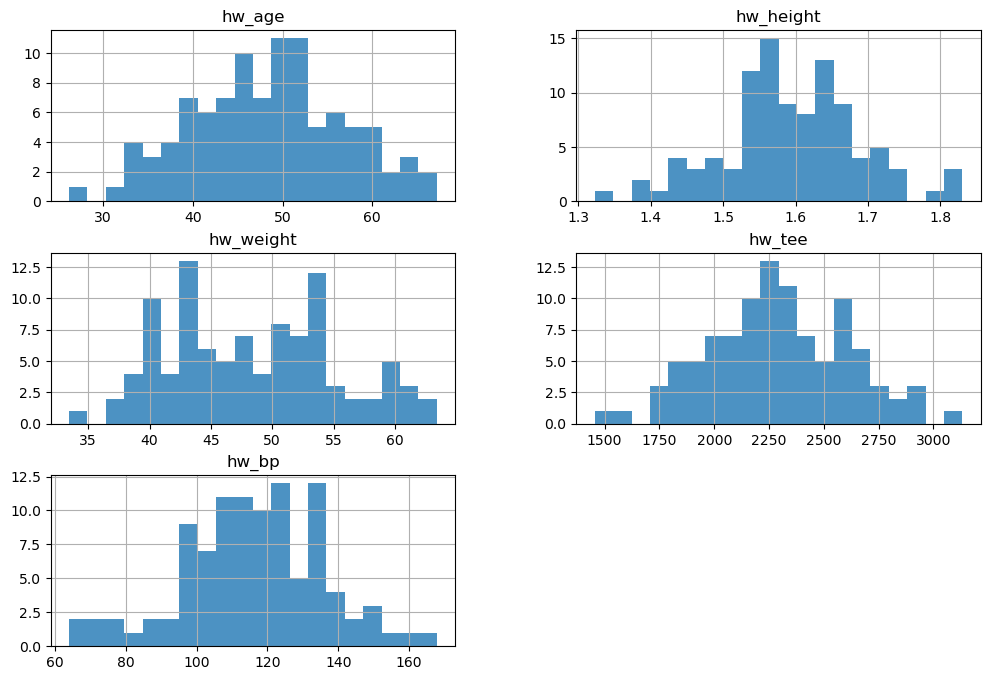

In [30]:
hw_dataframe.hist(alpha=0.8, bins=20, figsize=(12,8))

In [28]:
ob_dataframe = pd.DataFrame(obese_dataset, columns = ['obese_age', 'obese_height', 'obese_weight', 'obese_tee', 'obese_bp'])
ob_dataframe

,obese_age,obese_height,obese_weight,obese_tee,obese_bp
0,62.336014,1.346708,89.828248,2774.024549,138.669748
1,51.561242,1.328803,94.808614,2497.498176,170.904939
2,56.132030,1.504614,75.349741,2313.099946,129.702584
3,66.103056,1.404163,83.149768,2411.915004,152.374928
4,63.153708,1.491919,84.975189,2017.190063,77.055705
...,...,...,...,...,...
995,51.661679,1.707918,83.046712,2208.000119,119.943990
996,46.832649,1.409253,102.342547,2824.302997,142.162642
997,49.144119,1.480760,83.944821,2335.748497,146.944563
998,39.333874,1.378748,64.699859,2769.656109,128.610752


array([[<Axes: title={'center': 'obese_age'}>,
        <Axes: title={'center': 'obese_height'}>],
       [<Axes: title={'center': 'obese_weight'}>,
        <Axes: title={'center': 'obese_tee'}>],
       [<Axes: title={'center': 'obese_bp'}>, <Axes: >]], dtype=object)

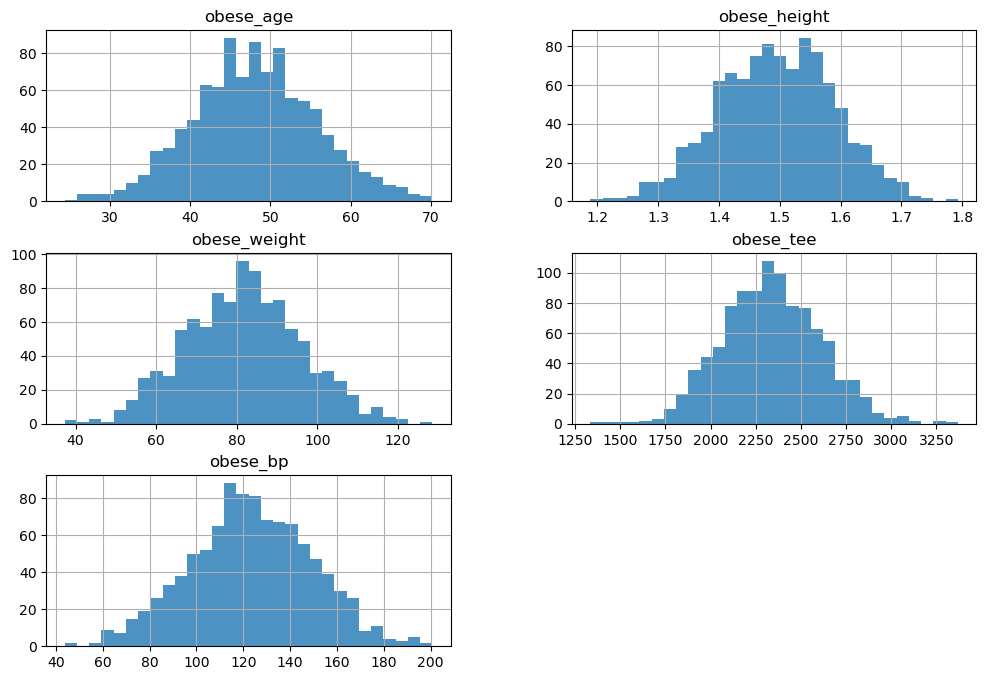

In [29]:
ob_dataframe.hist(alpha=0.8, bins=30, figsize=(12,8))

### t-Test comparing Weight and Sistolic Blood Proessure
***

In [27]:
ss.ttest_ind(hw_bp, obese_bp)

Ttest_indResult(statistic=-2.7048298340530783, pvalue=0.006939661404422186)

The null  hypothesis is there is no relastionship between weight and blood pressure

Synthesise/simulate a data set as closely matching their properties as possible.

Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

### References

[1] Rashidi AA, Heidari Bakavoli AR, Avan A, Aghasizade M, Ghazizadeh H, Tayefi M, Khayyatzadeh SS, Ebrahimi M, Moohebati M, Safarian M, Nematy M, Sadr-Bazzaz M, Ferns GA, Ghayour Mobarhan M. Dietary Intake and Its Relationship to Different Body Mass Index Categories: A Population-Based Study. J Res Health Sci. 2018 Sep 8;18(4):e00426. PMID: 30728312; PMCID: PMC6941633, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6941633/ accessed on 06 NOV 2023

https://datatofish.com/numpy-array-to-pandas-dataframe/